<a href="https://colab.research.google.com/github/Srinivas1258/GCP/blob/master/Tax_Fraud_detection_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! cp /content/drive/MyDrive/archive.zip .

In [3]:
!unzip archive.zip

Archive:  archive.zip
  inflating: application_data.csv    
  inflating: columns_description.csv  
  inflating: previous_application.csv  


In [4]:
import pandas as pd # data manipulation
import numpy as np # for numerical computation
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

In [65]:
df = pd.read_csv("application_data.csv")

#y= df["TARGET"]
#del df["TARGET"]
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
df["TARGET"].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [67]:
df.describe() # # statistics of dataframe

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [97]:
df1 = df[df["TARGET"]==0].sample(frac=0.05,random_state=42)

df2 = df[df["TARGET"]==1].sample(frac=0.45,random_state=42)

In [69]:
# df1 = df1.sample(frac=0.05,random_state=42)

In [98]:
frames = [df1, df2]

result = pd.concat(frames)

result.head() #49825

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
201622,333721,0,Cash loans,M,Y,Y,1,292500.0,1102500.0,32364.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
8728,110157,0,Revolving loans,F,N,Y,0,270000.0,720000.0,36000.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0
152555,276815,0,Revolving loans,F,Y,Y,1,135000.0,360000.0,18000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
218562,353213,0,Cash loans,F,Y,N,0,90000.0,225000.0,10426.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,6.0
299619,447111,0,Cash loans,F,N,N,0,283500.0,1800000.0,51718.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0


In [99]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25305 entries, 201622 to 246501
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 23.7+ MB


In [100]:
result.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [101]:
result.isnull().sum() ## checking missing values in df

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     3851
AMT_REQ_CREDIT_BUREAU_WEEK    3851
AMT_REQ_CREDIT_BUREAU_MON     3851
AMT_REQ_CREDIT_BUREAU_QRT     3851
AMT_REQ_CREDIT_BUREAU_YEAR    3851
Length: 122, dtype: int64

In [102]:
result = result.dropna(axis=1) # dropping missing values

In [103]:
result.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION

In [104]:
# drop duplicate rows based on all columns
result = result.drop_duplicates()

In [105]:
result["target"]=df["TARGET"].map({0:"Not Default",1:"Default"})



In [106]:
result["target"].value_counts()

Not Default    14134
Default        11171
Name: target, dtype: int64

<Axes: xlabel='target', ylabel='count'>

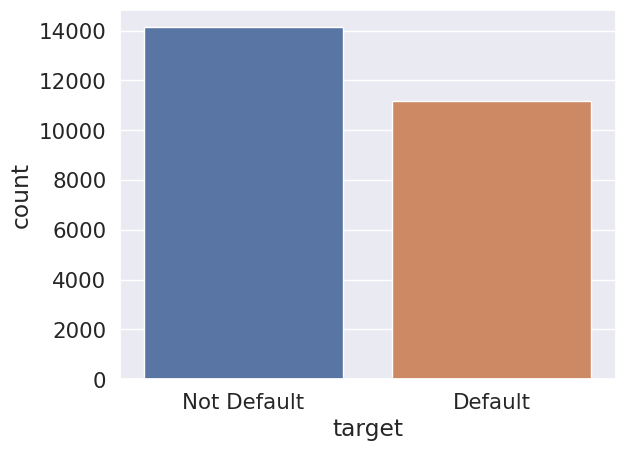

In [107]:
sns.countplot(result,x="target") # count plot

In [108]:
y=result["TARGET"] ## storing target value

del result["TARGET"]
del result["target"]

In [109]:
from sklearn.preprocessing import LabelEncoder
## converting cateogorical column into numeric
encoder=LabelEncoder()
object_cols=result.select_dtypes(include='object').columns
for i in object_cols:
  result[i]=encoder.fit_transform(result[i].astype(str))

result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25305 entries, 201622 to 246501
Data columns (total 56 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   25305 non-null  int64  
 1   NAME_CONTRACT_TYPE           25305 non-null  int64  
 2   CODE_GENDER                  25305 non-null  int64  
 3   FLAG_OWN_CAR                 25305 non-null  int64  
 4   FLAG_OWN_REALTY              25305 non-null  int64  
 5   CNT_CHILDREN                 25305 non-null  int64  
 6   AMT_INCOME_TOTAL             25305 non-null  float64
 7   AMT_CREDIT                   25305 non-null  float64
 8   NAME_INCOME_TYPE             25305 non-null  int64  
 9   NAME_EDUCATION_TYPE          25305 non-null  int64  
 10  NAME_FAMILY_STATUS           25305 non-null  int64  
 11  NAME_HOUSING_TYPE            25305 non-null  int64  
 12  REGION_POPULATION_RELATIVE   25305 non-null  float64
 13  DAYS_BIRTH

In [110]:
result.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
201622,333721,0,1,1,1,1,292500.0,1102500.0,7,4,...,0,0,0,0,0,0,0,0,0,0
8728,110157,1,0,0,1,0,270000.0,720000.0,3,2,...,0,0,0,0,0,0,0,0,0,0
152555,276815,1,0,1,1,1,135000.0,360000.0,7,1,...,0,0,0,0,0,0,0,0,0,0
218562,353213,0,0,1,0,0,90000.0,225000.0,1,4,...,0,0,0,0,0,0,0,0,0,0
299619,447111,0,0,0,0,0,283500.0,1800000.0,1,1,...,0,0,0,0,1,0,0,0,0,0


In [111]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
## selecting numeric columns in df
newdf = result.select_dtypes(include=numerics)

In [112]:
from sklearn.preprocessing import MinMaxScaler
mx=MinMaxScaler() # intialization of min_max_scaler
cols=newdf.columns
data=mx.fit_transform(newdf) # normalizing the input features data b/w 0 and 1
df2=pd.DataFrame(data,columns=cols) # converting the normalized data to dataframe
df2.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,0.656048,0.0,0.5,1.0,1.0,0.052632,0.085410,0.323675,1.000000,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.028505,1.0,0.0,0.0,1.0,0.000000,0.078208,0.206601,0.428571,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.496313,1.0,0.0,1.0,1.0,0.052632,0.034999,0.096414,1.000000,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.710762,0.0,0.0,1.0,0.0,0.000000,0.020596,0.055094,0.142857,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.974333,0.0,0.0,0.0,0.0,0.000000,0.082529,0.537163,0.142857,0.25,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


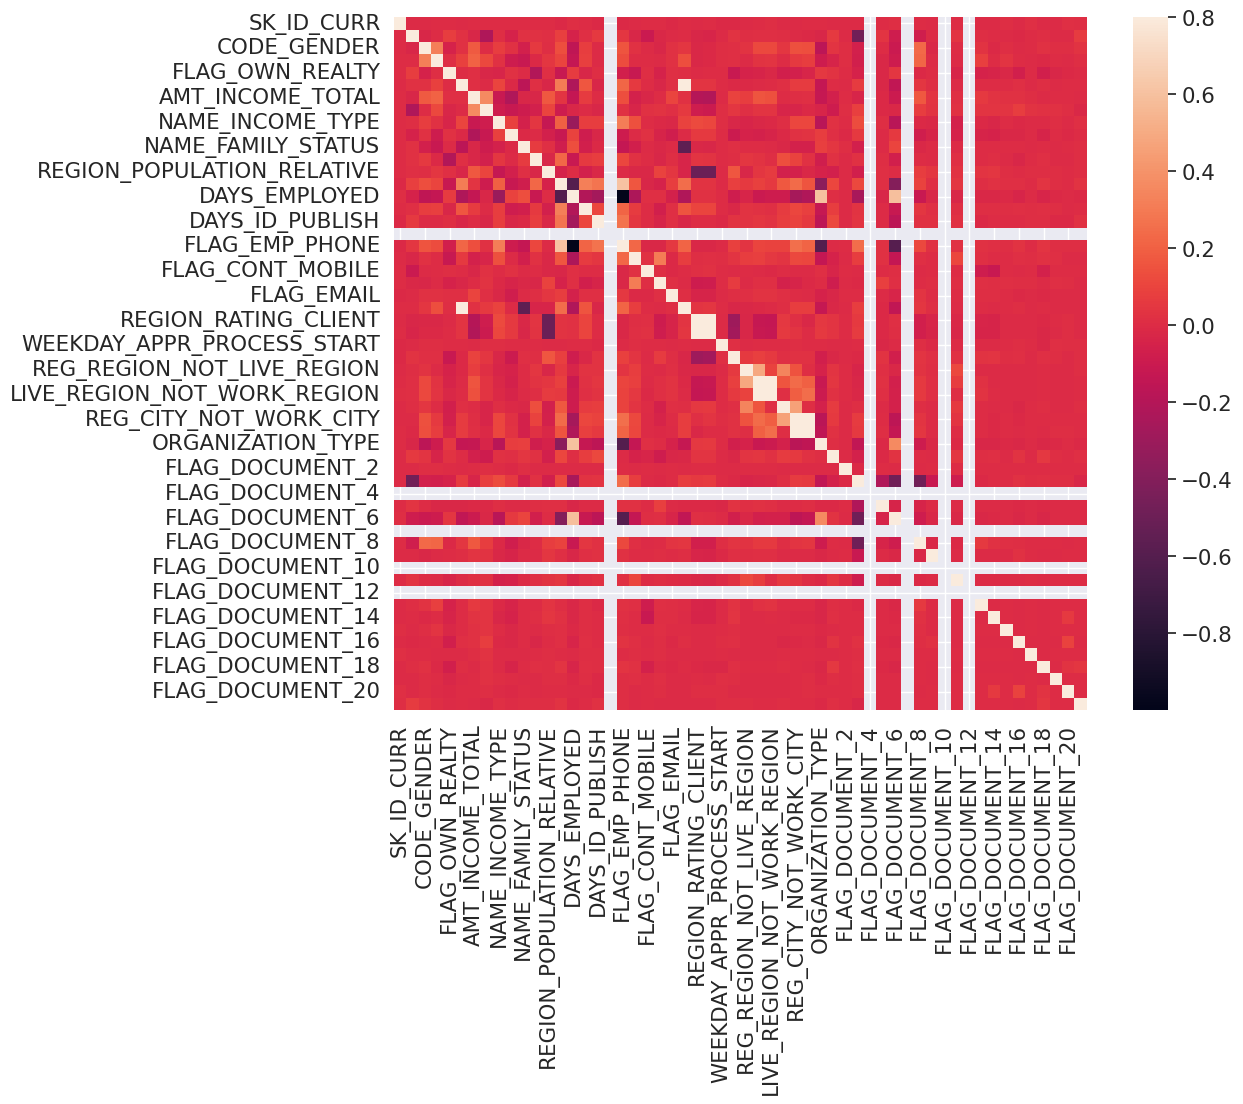

In [113]:
corrmat = df2.corr() # Correlation matrix for input features of dataset
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True) # heatmap for correlation matrix
plt.show()

In [117]:
# import scikit-learn
from sklearn.feature_selection import mutual_info_classif, SelectKBest
# split the dataframe into features and target
X = df2
#y = df2["Target"]
# compute mutual information
mi = mutual_info_classif(X, y)
# select the top 10 columns
selector = SelectKBest(mutual_info_classif, k=10)
selector.fit(X, y)
selected_columns = X.columns[selector.get_support()]
# filter the dataframe
df_selected = df[selected_columns]

In [126]:
selected_columns=['FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_CONT_MOBILE',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'FLAG_DOCUMENT_3']

In [127]:
df_selected = df2[selected_columns]
df_selected.head()

,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,FLAG_DOCUMENT_3
0,1.0,1.000000,1.00,0.2,0.0,1.0,1.0,1.0,1.0,1.0
1,1.0,0.428571,0.50,0.2,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1.000000,0.25,0.2,0.0,1.0,1.0,0.5,0.5,0.0
3,0.0,0.142857,1.00,1.0,0.0,1.0,1.0,0.5,0.5,1.0
4,0.0,0.142857,0.25,0.2,0.0,1.0,1.0,0.0,0.0,1.0


In [119]:
y.head()

201622    0
8728      0
152555    0
218562    0
299619    0
Name: TARGET, dtype: int64

In [131]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(df2,y,random_state=42,stratify=y,test_size=0.2) # splitting the dataset into train(80%) and test data(20%)
print(f'X_train size is {X_train.shape}, X_test size is {X_test.shape}')
print(f'y_train size is {y_train.shape}, y_test size is {y_test.shape}')

X_train size is (20244, 56), X_test size is (5061, 56)
y_train size is (20244,), y_test size is (5061,)


Confusion Matrix 


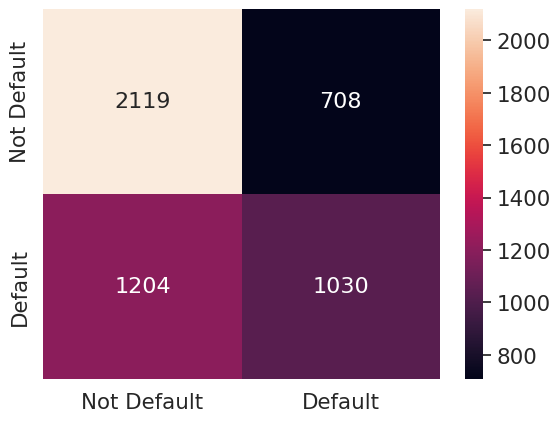

Logistic Regression classifier accuracy is : 0.6222090495949417


In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# using logistic regression model
lr=LogisticRegression(max_iter=10)
lr.fit(X_train,y_train)
lr_acc=lr.score(X_test,y_test)

y_lr_pred = lr.predict(X_test)

print('Confusion Matrix ')
arr=(confusion_matrix(y_test,y_lr_pred))
# print(arr)
df_lr = pd.DataFrame(arr, ["Not Default","Default"], ["Not Default","Default"])
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_lr, annot=True, annot_kws={"size": 16},fmt='g') # font size

plt.show()

print('Logistic Regression classifier accuracy is :',lr_acc)

Confusion Matrix 


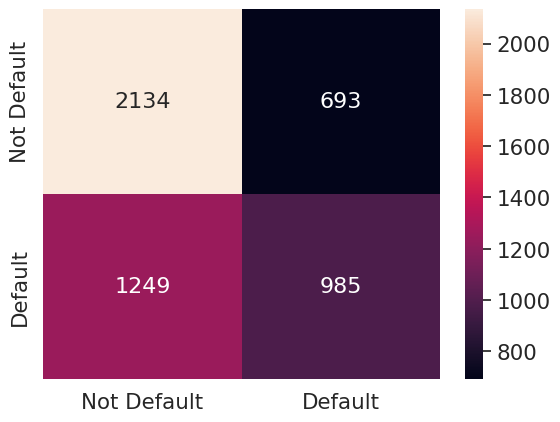

Random Forest classifier accuracy is : 0.6162813673187117


In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
rf_acc=rf.score(X_test,y_test)

y_rf_pred=rf.predict(X_test)
print('Confusion Matrix ')
arr=(confusion_matrix(y_test,y_rf_pred))
# print(arr)
df_rf = pd.DataFrame(arr, ["Not Default","Default"], ["Not Default","Default"])
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_rf, annot=True, annot_kws={"size": 16},fmt='g') # font size

plt.show()

print('Random Forest classifier accuracy is :',rf_acc)

In [53]:
# rf_acc

0.5809332664325138

Confusion Matrix 


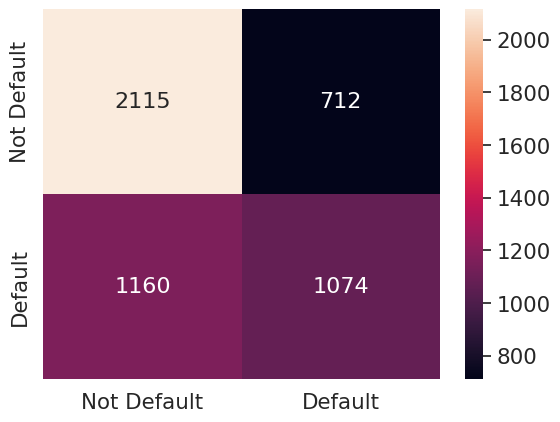

Gradient boosting classifier accuracy is : 0.6301126259632484


In [134]:
from sklearn.ensemble import GradientBoostingClassifier

gb=GradientBoostingClassifier()

gb.fit(X_train,y_train)
gb_acc=gb.score(X_test,y_test)

y_gb_pred=gb.predict(X_test)
print('Confusion Matrix ')
arr1=(confusion_matrix(y_test,y_gb_pred))
# print(arr)
df_gb = pd.DataFrame(arr1, ["Not Default","Default"], ["Not Default","Default"])
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_gb, annot=True, annot_kws={"size": 16},fmt='g') # font size

plt.show()

print('Gradient boosting classifier accuracy is :',gb_acc)

In [49]:
# gb.score(X_test,y_test)

0.5826392373306573

Confusion Matrix 


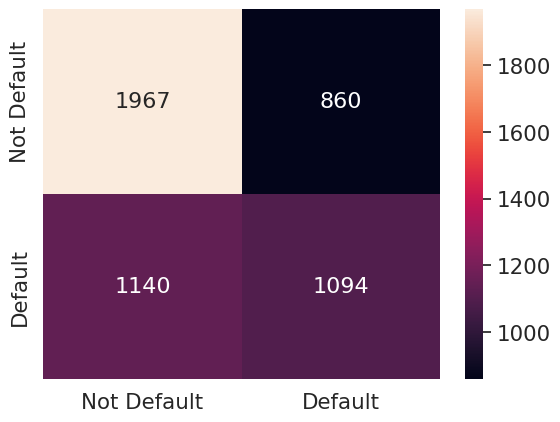

XGBoost classifier accuracy is : 0.604821181584667


In [135]:
import xgboost as xgb

xgb_clf=xgb.XGBClassifier()
xgb_clf.fit(X_train,y_train)
xgb_acc=xgb_clf.score(X_test,y_test)

y_xgb_pred=xgb_clf.predict(X_test)
print('Confusion Matrix ')
arr2=(confusion_matrix(y_test,y_xgb_pred))
# print(arr)
df_xgb = pd.DataFrame(arr2, ["Not Default","Default"], ["Not Default","Default"])
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_xgb, annot=True, annot_kws={"size": 16},fmt='g') # font size

plt.show()

print('XGBoost classifier accuracy is :',xgb_acc)

Confusion Matrix 


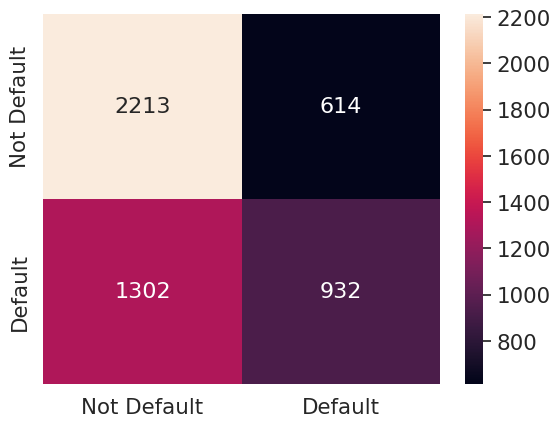

SVM accuracy is : 0.6214186919581111


In [136]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
svm_acc=svc.score(X_test,y_test)
y_svm_pred=svc.predict(X_test)
print('Confusion Matrix ')

arr4=(confusion_matrix(y_test,y_svm_pred))
# print(arr)
df_svm = pd.DataFrame(arr4, ["Not Default","Default"], ["Not Default","Default"])
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_svm, annot=True, annot_kws={"size": 16},fmt='g') # font size

plt.show()

print('SVM accuracy is :',svm_acc)

Confusion Matrix 


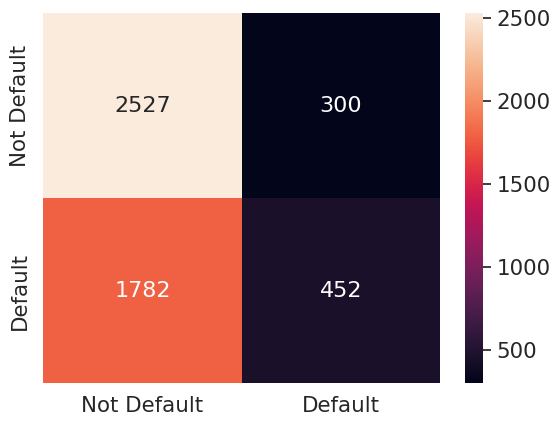

Naive Bayes Classifier Accuracy : 0.5886188500296384


In [137]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
NB=GaussianNB()
NB.fit(X_train,y_train)
nb_acc=NB.score(X_test,y_test)
y_nb_pred=NB.predict(X_test)
print('Confusion Matrix ')
arr5=(confusion_matrix(y_test,y_nb_pred))
# print(arr)
# print(type(arr))
# arr=arr.astype('float64')
df_nb = pd.DataFrame(arr5, ["Not Default","Default"], ["Not Default","Default"])
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_nb, annot=True, annot_kws={"size": 16},fmt='g') # font size

plt.show()

print('Naive Bayes Classifier Accuracy :',nb_acc)

Text(0, 0.5, 'Accuracy')

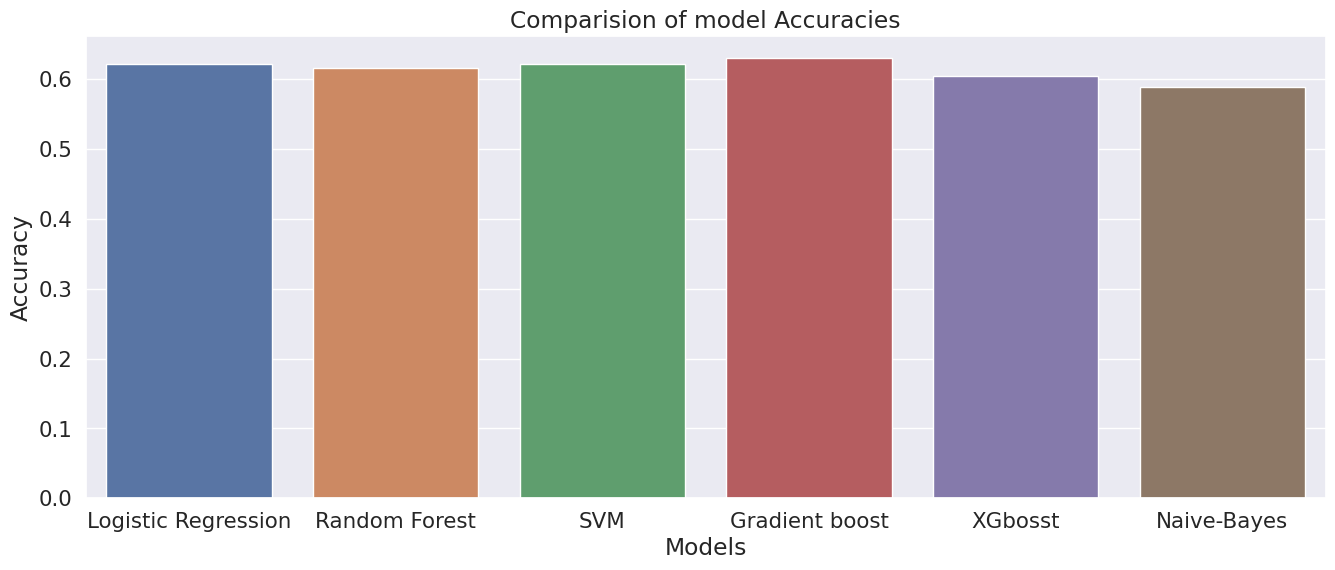

In [138]:
res=pd.DataFrame(data=[[lr_acc,rf_acc,svm_acc,gb_acc,xgb_acc,nb_acc]],columns=["Logistic Regression",'Random Forest','SVM','Gradient boost','XGbosst','Naive-Bayes'])
fig=plt.figure(figsize=(16,6))
sns.barplot(data=res)
plt.title('Comparision of model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')